In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
data = pd.read_csv(r'/home/ibrahim/Desktop/internship_project/data/Price.csv')
data

Unnamed: 0 symbol  adjusted_close        date
0                 0  LKMNH            6.45  2018-03-14
1                 1  SUMAS            4.78  2018-03-15
2                 2  ACSEL            2.69  2018-03-16
3                 3  FROTO           62.70  2018-03-19
4                 4  LKMNH            6.54  2018-03-20
5                 5  ACSEL            2.69  2018-03-21
6                 6  SUMAS            4.50  2018-03-22
7                 7  KRDMB            3.81  2018-03-23
8                 8  ENJSA            7.06  2018-03-26
9                 9  SUMAS            5.48  2018-03-14
10               10  ACSEL            2.68  2018-03-15
11               11  FROTO           63.75  2018-03-16
12               12  LKMNH            6.43  2018-03-19
13               13  ACSEL            2.68  2018-03-20
14               14  SUMAS            4.70  2018-03-21
15               15  KRDMB            3.84  2018-03-22
16               16  ENJSA            7.10  2018-03-23
17               17  LKMNH            6.41  2018-03-26
18               18  ACSEL            2.68  2018-03-14
19               19  SKBNK            1.59  2018-03-15
20               20  LKMNH            6.41  2018-03-16
21               21  ACSEL            2.67  2018-03-19
22               22  SUMAS            4.69  2018-03-20
23               23  SKBNK            1.57  2018-03-21
24               24  ENJSA            7.13  2018-03-22
25               25  LKMNH            6.45  2018-03-23
26               26  FROTO           62.30  2018-03-26
27               27  LKMNH            6.47  2018-03-27
28               28  FROTO           63.40  2018-03-28
29               29  ENJSA            7.12  2018-03-29
...             ...    ...             ...         ...
2041974     2041974  KCHOL           17.12  2018-03-13
2041975     2041975  METRO            1.03  2018-03-13
2041976     2041976   SODA            5.03  2018-03-13
2041977     2041977  AKSUE            8.48  2018-03-13
2041978     2041978  JANTS           32.18  2018-03-13
2041979     2041979   MAVI           53.15  2018-03-13
2041980     2041980  EMNIS            4.25  2018-03-13
2041981     2041981  AEFES           27.20  2018-03-13
2041982     2041982  TTRAK           77.20  2018-03-13
2041983     2041983  IHEVA            0.48  2018-03-13
2041984     2041984  GSDDE            1.47  2018-03-13
2041985     2041985  KOZAL           36.00  2018-03-13
2041986     2041986  KRONT           14.40  2018-03-13
2041987     2041987  BIZIM            8.62  2018-03-13
2041988     2041988  NUHCM           10.39  2018-03-13
2041989     2041989  KARSN            2.15  2018-03-13
2041990     2041990  RYGYO            1.51  2018-03-13
2041991     2041991  GOZDE            5.57  2018-03-13
2041992     2041992  ALGYO           49.96  2018-03-13
2041993     2041993  ARENA            3.92  2018-03-13
2041994     2041994  ERBOS           83.00  2018-03-13
2041995     2041995  DMSAS            2.71  2018-03-13
2041996     2041996  PAGYO            4.69  2018-03-13
2041997     2041997  VAKFN            2.20  2018-03-13
2041998     2041998  BMEKS            0.25  2018-03-13
2041999     2041999  TRGYO            3.08  2018-03-13
2042000     2042000  DOHOL            0.75  2018-03-13
2042001     2042001  ANACM            3.73  2018-03-13
2042002     2042002   ADEL           17.09  2018-03-13
2042003     2042003  GEDZA            7.29  2018-03-13

[2042004 rows x 4 columns]

In [34]:
datacl = data.drop("Unnamed: 0", axis=1)

In [35]:
pivotdata = data.pivot_table(values='adjusted_close',index='date',columns='symbol')
pivotdata = pivotdata['2002-01-01':]
returns = pivotdata.pct_change()

In [36]:
scores = returns
scores.index = pd.to_datetime(scores.index)
scores = scores.rolling('365D').std()
scores = scores.dropna(thresh=10,axis=0)

In [37]:
pivotdata = pivotdata.iloc[3:]

In [40]:
import returnbyfactors

In [41]:
result = returnbyfactors.analyze_by_score(pivotdata,scores)

In [42]:
result

1dayreturn  3dayreturn  5dayreturn
index                                     
Group1   -0.000707   -0.001022   -0.001075
Group2   -0.000428   -0.000159    0.000335
Group3   -0.000414   -0.000128    0.000468
Group4   -0.000508   -0.000308    0.000145
Group5    0.002057    0.001618    0.000127

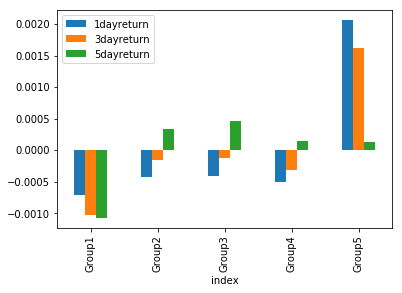

In [43]:
result.plot(kind='bar')